In [1]:
import numpy as np
import pandas as pd
from pycaret.classification import *

In [2]:
df1 = pd.read_csv("training.csv")
df2 = pd.read_csv("testing.csv")
dftrain,dftest = df1,df2

In [3]:
clf1 = setup(data = dftrain, 
             target = 'Attrition'
             , use_gpu=True   
             ,test_data=dftest
             , normalize = True
              ,feature_selection = True
             ,fix_imbalance = True
            )


,Description,Value
0,session_id,8462
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(1177, 27)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,20
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
top10 = compare_models(n_select = 10,sort='F1',cross_validation=False,exclude = ['lightgbm','ridge','svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7440,0.8002,0.7447,0.3571,0.4828,0.3396,0.3800,0.0800
xgboost,Extreme Gradient Boosting,0.8601,0.7938,0.3830,0.6000,0.4675,0.3915,0.4046,116.1500
ada,Ada Boost Classifier,0.8328,0.8089,0.4468,0.4773,0.4615,0.3627,0.3630,0.2600
lr,Logistic Regression,0.7509,0.8028,0.6596,0.3523,0.4593,0.3163,0.3425,0.0600
gbc,Gradient Boosting Classifier,0.8567,0.8184,0.3404,0.5926,0.4324,0.3572,0.3752,1.0000
catboost,CatBoost Classifier,0.8669,0.8049,0.2979,0.7000,0.4179,0.3563,0.3980,2.6800
rf,Random Forest Classifier,0.8601,0.8084,0.2340,0.6875,0.3492,0.2915,0.3452,0.2600
knn,K Neighbors Classifier,0.4539,0.6748,0.8723,0.2103,0.3388,0.1083,0.1916,0.0400
et,Extra Trees Classifier,0.8532,0.7964,0.2128,0.6250,0.3175,0.2569,0.3043,0.2300
qda,Quadratic Discriminant Analysis,0.2901,0.5772,1.0000,0.1843,0.3113,0.0554,0.1687,0.0600


In [5]:
tuned_top10 = [(tune_model(i, optimize = 'F1')) for i in top10]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5932,0.7177,0.7895,0.2542,0.3846,0.1864,0.2536
1,0.6017,0.7150,0.6842,0.2407,0.3562,0.1548,0.1992
2,0.7288,0.8905,0.9474,0.3673,0.5294,0.3872,0.4731
3,0.6610,0.6656,0.7895,0.2941,0.4286,0.2534,0.3159
4,0.5593,0.6816,0.6842,0.2203,0.3333,0.1186,0.1614
5,0.5763,0.6938,0.7368,0.2373,0.3590,0.1525,0.2075
6,0.6017,0.7236,0.7368,0.2500,0.3733,0.1749,0.2301
7,0.6581,0.7787,0.7895,0.2941,0.4286,0.2514,0.3140
8,0.6752,0.7143,0.7368,0.2979,0.4242,0.2510,0.3010
9,0.6838,0.6944,0.5789,0.2750,0.3729,0.1958,0.2201


In [16]:
# stacker = stack_models(estimator_list = [top10[0]]+top10[2:], meta_model = top10[1])
stacker = stack_models(estimator_list = top10[1:], meta_model = top10[0])
pred = predict_model(stacker)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8475,0.6656,0.0526,1.0000,0.1000,0.0853,0.2110
1,0.8390,0.6874,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8644,0.8480,0.1579,1.0000,0.2727,0.2393,0.3687
3,0.8305,0.5981,0.0000,0.0000,0.0000,-0.0164,-0.0405
4,0.8475,0.7996,0.1053,0.6667,0.1818,0.1442,0.2222
5,0.8390,0.6629,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8305,0.6449,0.0526,0.3333,0.0909,0.0492,0.0757
7,0.8632,0.8201,0.1579,1.0000,0.2727,0.2390,0.3684
8,0.8462,0.7111,0.1053,0.6667,0.1818,0.1439,0.2218
9,0.8120,0.6520,0.3158,0.4000,0.3529,0.2447,0.2471


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.8498,0.7226,0.0851,0.8000,0.1538,0.1269,0.2296


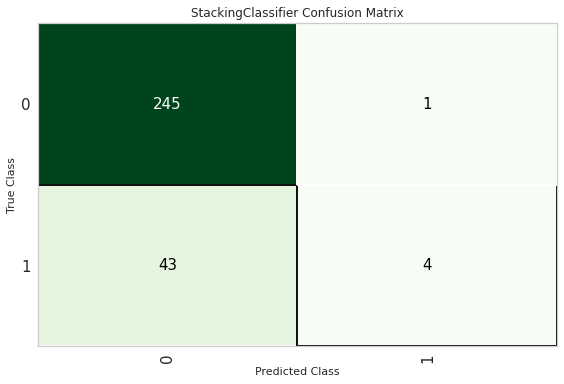

In [17]:
plot_model(stacker, plot='confusion_matrix')

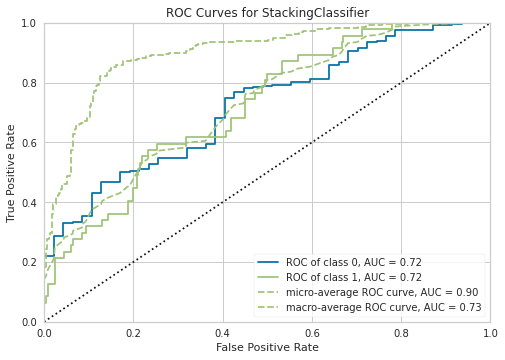

In [18]:
# AUC 
plot_model(stacker, plot = 'auc')

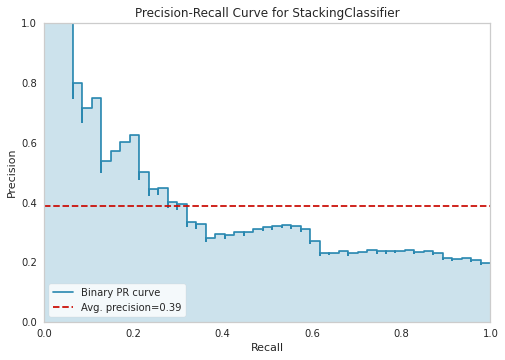

In [19]:
# PR
plot_model(stacker, plot = 'pr')

In [10]:
blender = blend_models(estimator_list=top10, method='soft')
pred = predict_model(blender)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7712,0.7634,0.5263,0.3571,0.4255,0.2892,0.2976
1,0.8305,0.7650,0.3158,0.4615,0.3750,0.2809,0.2877
2,0.8475,0.9367,0.4737,0.5294,0.5000,0.4103,0.4112
3,0.8051,0.7204,0.3158,0.3750,0.3429,0.2294,0.2306
4,0.7881,0.7863,0.4737,0.3750,0.4186,0.2912,0.2942
5,0.8136,0.7406,0.5263,0.4348,0.4762,0.3640,0.3665
6,0.8220,0.8171,0.6842,0.4643,0.5532,0.4471,0.4602
7,0.8034,0.8260,0.6316,0.4286,0.5106,0.3932,0.4048
8,0.8205,0.8340,0.5789,0.4583,0.5116,0.4035,0.4076
9,0.8718,0.7696,0.3158,0.7500,0.4444,0.3853,0.4316


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8191,0.8218,0.5319,0.4464,0.4854,0.3767,0.3788


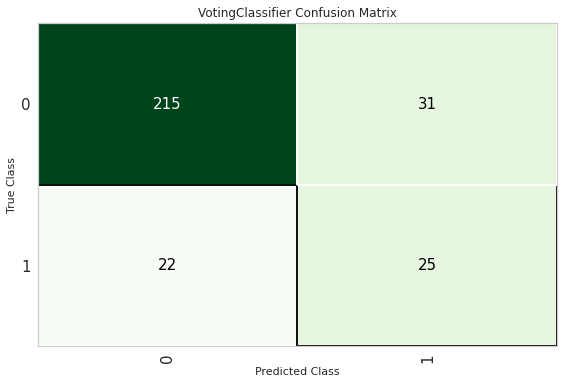

In [11]:
plot_model(blender, plot='confusion_matrix')

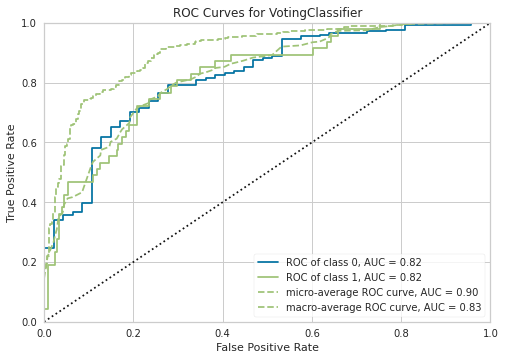

In [12]:
# AUC 
plot_model(blender, plot = 'auc')

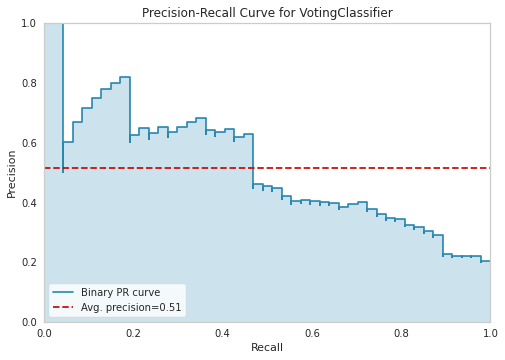

In [13]:
# PR
plot_model(blender, plot = 'pr')